<h2>Background</h2>
<p>Problem: Since Youtube has phased out the search by categories function ,I have used Youtube Data Api to parse out videos by category from the Popular Page and conduct Data Analysis on it. Furthermore with machine learning, we can predict how well an videos does based on their statistics and also how the Youtube Videos are being clustered based on these statistics.</p>
<h3>With this information,we can make better decisions when creating Youtube videos.</h3>



<center><img src= "https://assets.stickpng.com/images/580b57fcd9996e24bc43c545.png" alt ="youtube" width=200px height=auto></center>

<h2 color = "blue">Initialization</h2>

In [1]:
import numpy as np
import pandas as pd
from helpers import UserResponse
from helpers import ApiResponse
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline


<h2>Sample Input for user</h2>
<ul>
<li> Gaming</li>
<li> Comedy</li>
<li>News & Politics</li>
</ul>

[If you want to learn more about accepted inputs](https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/)





<h2> Querying for user data</h2>
<span>Check for  the category of videos that the user want to analyse</span>

In [2]:
# Get user response and carry out
# the autocorrect function on it
user = UserResponse()
category = user.get_category()
print(category)

What category do u want to analyse from the youtube popular page ?comedy
('23', 'Comedy')


<h2> Getting Response from the Youtube Api</h2>

In [3]:
# Get response from API by creating a response object
response = ApiResponse(category[0])
# Get snippet data from youtube API
content_result = response.scrape_for_videos().scrape_for_content("snippet")
# table for snippet data
df = pd.json_normalize(data=content_result["items"])
# table for youtuber statistics
df_youtuber_statistics = pd.DataFrame()
for channel in df["snippet.channelId"]:
    # Using the channelId in each video, parse out channel statistics
    response_channel = response.scrape_for_channel_stats(channel)
    staistics_response = response_channel["items"][0]["statistics"]
    stats_df =pd.json_normalize(staistics_response)
    stats_df.loc[0, 'channelId'] = channel
    df_youtuber_statistics = df_youtuber_statistics.append(stats_df.loc[0],ignore_index=True)
# Get  video statistics data from youtube data Api
stats_result = response.scrape_for_content("statistics")
df_stats = pd.json_normalize(data=stats_result["items"])
# Join both statistics and snippet data into one table
df_table =df.merge(df_stats,on="id")
#df_table
df_youtuber_statistics.columns=["snippet.channelId","channel.hiddenSubscriberCount","channel.subscriberCount","channel.videoCount","channel.viewCount"]
# Join statistics table and main table together based on index
df_table =pd.merge(df_table, df_youtuber_statistics, left_index=True, right_index=True)
df_table

,kind_x,etag_x,id,snippet.publishedAt,snippet.channelId_x,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,statistics.viewCount,statistics.likeCount,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,snippet.channelId_y,channel.hiddenSubscriberCount,channel.subscriberCount,channel.videoCount,channel.viewCount
0,youtube#video,tbAZL0NaSubkcdfr_KIWjb4YvXU,Ud9AbH3Wn2A,2020-12-30T22:00:09Z,UCPcFg7aBbaVzXoIKSNqwaww,THE WORST CHRISTMAS GIFTS OF 2020 (YIAY #529),PREVIOUS YIAY ► https://www.youtube.com/watch?...,https://i.ytimg.com/vi/Ud9AbH3Wn2A/default.jpg,120,90,...,462317,43393,416,0,8872,UCPcFg7aBbaVzXoIKSNqwaww,0.0,4700000,1249,2375026798
1,youtube#video,yz6tS_B3mKHFWtdfVUoB6n2kdhM,aHS-rwGYjwM,2020-12-29T18:30:00Z,UCSUf5_EPEfl4zlBKZHkZdmw,BANG,Thanks to HelloFresh for sponsoring this video...,https://i.ytimg.com/vi/aHS-rwGYjwM/default.jpg,120,90,...,1871560,175450,1422,0,16718,UCSUf5_EPEfl4zlBKZHkZdmw,0.0,4230000,228,697513932
2,youtube#video,1yW908lOVPVVTL9xthPQsBymArY,h6PZSwkJgCw,2020-12-28T21:19:00Z,UCpIafFPGutTAKOBHMtGen7g,scrolling through midwestern family photos,what a special family!!!\n↓COME FOLLOW ME HERE...,https://i.ytimg.com/vi/h6PZSwkJgCw/default.jpg,120,90,...,954113,85613,961,0,2900,UCpIafFPGutTAKOBHMtGen7g,0.0,2850000,648,624154493
3,youtube#video,0sAKoSwIUlTzE2HV2QpiCWTf_0E,GkrhnnOTFks,2020-12-28T16:45:00Z,UCc35WvHmQjLE8NN4Y_ITmUQ,people who use air fryers,did ur friend just get an air fryer?? DON'T WO...,https://i.ytimg.com/vi/GkrhnnOTFks/default.jpg,120,90,...,823268,38972,650,0,2038,UCc35WvHmQjLE8NN4Y_ITmUQ,0.0,1820000,285,273444694
4,youtube#video,7ONeWXm1GnOWFSjhYz0WP4HtH_8,uUj674eH1sE,2020-12-27T19:59:22Z,UCn1XB-jvmd9fXMzhiA6IR0w,I got scammed,"Hey I'm streaming more often on twitch now, co...",https://i.ytimg.com/vi/uUj674eH1sE/default.jpg,120,90,...,1523918,120643,1059,0,6349,UCn1XB-jvmd9fXMzhiA6IR0w,0.0,7340000,196,1110909032
5,youtube#video,VtVC-pNqV7fy9g3NIQx0tQ3Snh0,iht8e_HtLso,2020-12-26T16:00:17Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Bake Cheesecake Without A Recipe,Behind The Try: A Try Guys Documentary is now ...,https://i.ytimg.com/vi/iht8e_HtLso/default.jpg,120,90,...,3305140,156385,1855,0,14857,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606
6,youtube#video,Up-RmWQ3E-iPJQvmQokwzgIfLU8,ric1WjAnrNg,2020-12-23T22:20:57Z,UCmraHp1nkUsFWLqR7SWToIg,ALEX AND JEFF FIGHT TO SAVE CHRISTMAS | Jeff's...,Get Honey for FREE today ▸ http://joinhoney.co...,https://i.ytimg.com/vi/ric1WjAnrNg/default.jpg,120,90,...,1283521,136685,1085,0,8842,UCmraHp1nkUsFWLqR7SWToIg,0.0,2750000,93,238311111
7,youtube#video,AsYN-tk8GwSTp878go3hXncvhEI,KE8-VK7Net0,2020-12-23T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,Keith Eats & Drinks Everything At Starbucks,There's just something about those Starbucks h...,https://i.ytimg.com/vi/KE8-VK7Net0/default.jpg,120,90,...,2223283,78480,1024,0,6418,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606
8,youtube#video,gwKapEbbiK7Cw6GnMmChtO7AaEI,0cMLZ1hLLEY,2020-12-22T17:00:18Z,UCwtnkRZcvL4bfopzJ-Von8Q,What It's Like To Be A Twin On Christmas - Mer...,Ever wondered what it’s like to be a twin on C...,https://i.ytimg.com/vi/0cMLZ1hLLEY/default.jpg,120,90,...,918119,51186,562,0,6736,UCwtnkRZcvL4bfopzJ-Von8Q,0.0,5900000,524,1221133459


<h2> Data Cleaning</h2>
<ul>
<li>Drop Irrelevent Columns and columns with Na Values</li>
<li>Include Category Column to show data more clearly</li>
</ul>

In [4]:
# Drop Irrelevant Columns
for column in df_table.columns:
    if"snippet.thumbnails" in column or "etag"in column or"kind" in column:
        df_table.drop(column, axis = 1, inplace=True)
# Place Category Column so that users know what category we are 
# looking at
df_table["category"] = category[1]
df_table.fillna("Not Stated",inplace=True)
df_table["Like_Percentage"] = (df_table["statistics.likeCount"].astype(int)/df_table["statistics.viewCount"].astype(int))*100
df_table

,id,snippet.publishedAt,snippet.channelId_x,snippet.title,snippet.description,snippet.channelTitle,snippet.tags,snippet.categoryId,snippet.liveBroadcastContent,snippet.localized.title,...,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,snippet.channelId_y,channel.hiddenSubscriberCount,channel.subscriberCount,channel.videoCount,channel.viewCount,category,Like_Percentage
0,Ud9AbH3Wn2A,2020-12-30T22:00:09Z,UCPcFg7aBbaVzXoIKSNqwaww,THE WORST CHRISTMAS GIFTS OF 2020 (YIAY #529),PREVIOUS YIAY ► https://www.youtube.com/watch?...,jacksfilms,"[Jacksfilms, Jack Douglass, YGS, YGS 100, YGS ...",23,none,THE WORST CHRISTMAS GIFTS OF 2020 (YIAY #529),...,416,0,8872,UCPcFg7aBbaVzXoIKSNqwaww,0.0,4700000,1249,2375026798,Comedy,9.385984
1,aHS-rwGYjwM,2020-12-29T18:30:00Z,UCSUf5_EPEfl4zlBKZHkZdmw,BANG,Thanks to HelloFresh for sponsoring this video...,Danny Gonzalez,"[danny gonzalez, funny, commentary, comedy, re...",23,none,BANG,...,1422,0,16718,UCSUf5_EPEfl4zlBKZHkZdmw,0.0,4230000,228,697513932,Comedy,9.374532
2,h6PZSwkJgCw,2020-12-28T21:19:00Z,UCpIafFPGutTAKOBHMtGen7g,scrolling through midwestern family photos,what a special family!!!\n↓COME FOLLOW ME HERE...,Gus Johnson,"[family christmas photos, holiday photos, midw...",23,none,scrolling through midwestern family photos,...,961,0,2900,UCpIafFPGutTAKOBHMtGen7g,0.0,2850000,648,624154493,Comedy,8.973046
3,GkrhnnOTFks,2020-12-28T16:45:00Z,UCc35WvHmQjLE8NN4Y_ITmUQ,people who use air fryers,did ur friend just get an air fryer?? DON'T WO...,Trevor Wallace,"[trevor wallace, trevor walace, travis wallace...",23,none,people who use air fryers,...,650,0,2038,UCc35WvHmQjLE8NN4Y_ITmUQ,0.0,1820000,285,273444694,Comedy,4.733817
4,uUj674eH1sE,2020-12-27T19:59:22Z,UCn1XB-jvmd9fXMzhiA6IR0w,I got scammed,"Hey I'm streaming more often on twitch now, co...",Domics,"[domics, animation]",23,none,I got scammed,...,1059,0,6349,UCn1XB-jvmd9fXMzhiA6IR0w,0.0,7340000,196,1110909032,Comedy,7.916633
5,iht8e_HtLso,2020-12-26T16:00:17Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Bake Cheesecake Without A Recipe,Behind The Try: A Try Guys Documentary is now ...,The Try Guys,"[try guys, keith, ned, zach, eugene, habersber...",23,none,The Try Guys Bake Cheesecake Without A Recipe,...,1855,0,14857,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606,Comedy,4.731570
6,ric1WjAnrNg,2020-12-23T22:20:57Z,UCmraHp1nkUsFWLqR7SWToIg,ALEX AND JEFF FIGHT TO SAVE CHRISTMAS | Jeff's...,Get Honey for FREE today ▸ http://joinhoney.co...,Jeff Wittek,"[Jeff's barbershop, Jeff wittek, vlog squad, D...",23,none,ALEX AND JEFF FIGHT TO SAVE CHRISTMAS | Jeff's...,...,1085,0,8842,UCmraHp1nkUsFWLqR7SWToIg,0.0,2750000,93,238311111,Comedy,10.649222
7,KE8-VK7Net0,2020-12-23T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,Keith Eats & Drinks Everything At Starbucks,There's just something about those Starbucks h...,The Try Guys,"[try guys, keith, ned, zach, eugene, habersber...",23,none,Keith Eats & Drinks Everything At Starbucks,...,1024,0,6418,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606,Comedy,3.529915
8,0cMLZ1hLLEY,2020-12-22T17:00:18Z,UCwtnkRZcvL4bfopzJ-Von8Q,What It's Like To Be A Twin On Christmas - Mer...,Ever wondered what it’s like to be a twin on C...,merrelltwins,"[Merrell Twins, Twins, Merrell, Veronica Merre...",23,none,What It's Like To Be A Twin On Christmas - Mer...,...,562,0,6736,UCwtnkRZcvL4bfopzJ-Von8Q,0.0,5900000,524,1221133459,Comedy,5.575094


<h2>Correlation Matrix on Numeric Variables </h2>
<span> Check for factors that has a high correlation value with the peformance of the video</span>


In [5]:
# Select columns with numeric data type
df_table = df_table.astype({"statistics.viewCount":int,"channel.videoCount":np.int64,"channel.viewCount":np.int64,"channel.subscriberCount":np.int64,"Like_Percentage":np.int64})
df_table_numeric = df_table.select_dtypes('number')
df_numeric_table_corr = df_table_numeric.corr()
df_numeric_table_corr = df_numeric_table_corr.style.set_precision(2).background_gradient(cmap='coolwarm')
df_numeric_table_corr

D:\Anacodonda\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
D:\Anacodonda\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,statistics.viewCount,channel.hiddenSubscriberCount,channel.subscriberCount,channel.videoCount,channel.viewCount,Like_Percentage
statistics.viewCount,1.00,nan,0.62,-0.50,0.13,-0.42
channel.hiddenSubscriberCount,nan,nan,nan,nan,nan,nan
channel.subscriberCount,0.62,nan,1.00,-0.06,0.64,-0.45
channel.videoCount,-0.50,nan,-0.06,1.00,0.68,0.20
channel.viewCount,0.13,nan,0.64,0.68,1.00,-0.16
Like_Percentage,-0.42,nan,-0.45,0.20,-0.16,1.00


<span> Using the correlation matrix , we find out that video count and like percentage has the biggest correlation on the peformance of a video (Views)
Hence we will be using these 2 factors:
<ol>
<li>Like Percentage</li>
<li>Subscriber Count</li>
</ol>

<h2> Data Visualization</h2>

<span> Plot a graph of Youtube views against the respective video in the popular page</span>

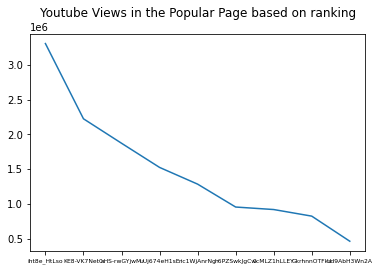

In [19]:
# Get the youtube videos in the popular page in descending order by the number
# of views
df_table.sort_values(by="statistics.viewCount",inplace = True,ascending = False)
youtube_title = df_table["id"]
youtube_video_views = df_table["statistics.viewCount"]
plt.plot(youtube_title,youtube_video_views)
# Change size of x label
plt.tick_params(axis='x', which='major', labelsize=6)
ttl = plt.title('Youtube Views in the Popular Page based on ranking')
ttl.set_position([.5, 1.05])

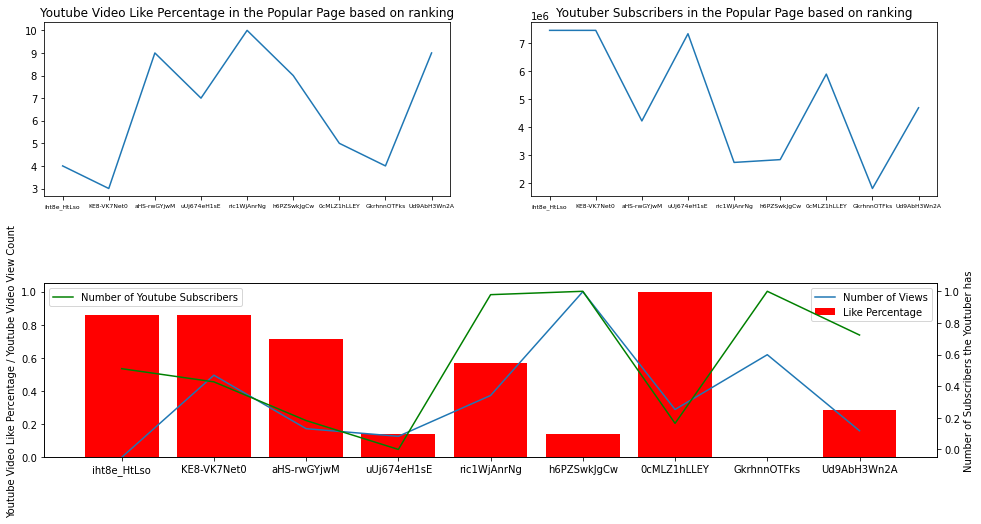

In [7]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
# As the variables are measured in different scale, I used a min max scaler to scale it down
df_table_scale = pd.DataFrame(my_scaler.fit_transform(df_table_numeric),columns=df_table_numeric.columns)
fig_dimensions = (16,8)
fig = plt.figure(figsize = fig_dimensions)
ax1 = fig.add_subplot(2,2,1)
# Plot a graph of like percentage against each video
like_percentage = df_table["Like_Percentage"]
ax1.plot(youtube_title,like_percentage)
ax1.tick_params(axis='x', which='major', labelsize=6)
ax1.set_title('Youtube Video Like Percentage in the Popular Page based on ranking')
ax2 = fig.add_subplot(2,2,2)
# Plot a graph of subscriber count against each video
youtuber_subscriber_count = df_table["channel.subscriberCount"]
ax2.plot(youtube_title,youtuber_subscriber_count)
ax2.tick_params(axis='x', which='major', labelsize=6)
ax2.set_title('Youtuber Subscribers in the Popular Page based on ranking')
fig.subplots_adjust(hspace=.5)
ax3 = fig.add_subplot(2,1,2)
# Combine all graphs together
ax3.bar(df_table["id"],df_table_scale["Like_Percentage"],color="red")
ax3.plot(df_table["id"],df_table_scale["statistics.viewCount"])
ax3.set_ylabel('Youtube Video Like Percentage / Youtube Video View Count')
ax3.legend(["Number of Views","Like Percentage"])
ax4 = ax3.twinx()
ax4.set_ylabel('Number of Subscribers the Youtuber has')
youtuber_subscriber = df_table_scale["channel.subscriberCount"]
ax4.plot(df_table["id"],youtuber_subscriber,color='green',label ="Number of Youtube Subscribers")
ax4.legend(loc=2)

<h2> Insights</h2>
<p> From the graph plotted , we can estimate there is an inverse relationship between the like percentage and the number of views that a youtube video has.
Furthermore, we also can estimate there is a positive correlation between the subscriber count and the number of views the youtube video has</p>

<h2>  Multivariate Linear Regression</h2> 
<p>Using Linear Regression  to find out  more about the relationship between youtube views and factors like (like percentage) and (number of subscribers) a youtuber has.</p>

<h2> Train Test Split</h2>

In [8]:
from sklearn.model_selection import train_test_split
all_x = df_table_scale[['Like_Percentage', 'channel.subscriberCount']]
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(all_x, df_table_scale["statistics.viewCount"], random_state=42)

<h2> Fit Model </h2>

In [9]:
from sklearn import datasets, linear_model
multi_youtube_lr = linear_model.LinearRegression()
# Train linear regression model
multi_youtube_lr.fit(X_train, y_train)

LinearRegression()

<h2>Intepret the Model </h2>

In [10]:
print(multi_youtube_lr.coef_)
print(multi_youtube_lr.intercept_)
#Youtube views = -0.5565981(Like Percentage) -0.34396979(channel.subscriberCount) + 0.8903464321764041

[0.04469357 0.11660145]
0.11074127332287104


<h2> Accessing the model </h2>

In [11]:
from sklearn.metrics import r2_score 
fitted_values = multi_youtube_lr.predict(X_test)
print(r2_score(y_test, fitted_values))

-5.001251796214497


<h2> Insights</h2>
<p> As there is a negative r2 score, it shows there isn't a linear relationship between Youtube Views and factors such
    as Like Percentage and Subscriber Count. Therefore, we can forgo this linear regression model. </p>

<h2>K-Means Clustering</h2>

<p> Group Youtube videos based on factors such as the the like percentage of the video and the subscriber count.</p>

In [12]:
# Group youtube videos based on attributes like percentage and subscriber count
df_youtube_cluster = df_table[["Like_Percentage","channel.subscriberCount"]]
df_youtube_cluster.head()

,Like_Percentage,channel.subscriberCount
5,4,7460000
7,3,7460000
1,9,4230000
4,7,7340000
6,10,2750000


<h2> Elbow Plot</h2>

Text(0, 0.5, 'Inertia')

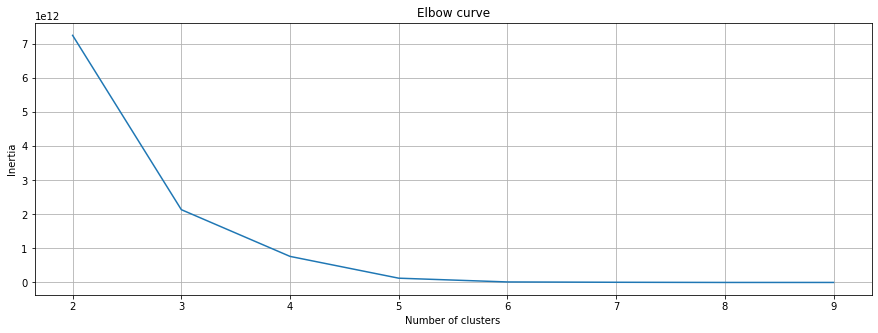

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

X = df_youtube_cluster
distorsions = [] 

for k in range(2, len(df_table)+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, len(df_table)+1), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<h2> Select K </h2>

In [14]:
# 3 clusters is the most appropiate as it is an point of inflexion.
k = 3
model = KMeans(n_clusters=k,
               random_state=0)

youtube_kmeans = model.fit(df_youtube_cluster) # < DataFrame of All Variables
print(youtube_kmeans)


KMeans(n_clusters=3, random_state=0)


In [15]:
df_table['label'] = youtube_kmeans.labels_
df_table

,id,snippet.publishedAt,snippet.channelId_x,snippet.title,snippet.description,snippet.channelTitle,snippet.tags,snippet.categoryId,snippet.liveBroadcastContent,snippet.localized.title,...,statistics.favoriteCount,statistics.commentCount,snippet.channelId_y,channel.hiddenSubscriberCount,channel.subscriberCount,channel.videoCount,channel.viewCount,category,Like_Percentage,label
5,iht8e_HtLso,2020-12-26T16:00:17Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Bake Cheesecake Without A Recipe,Behind The Try: A Try Guys Documentary is now ...,The Try Guys,"[try guys, keith, ned, zach, eugene, habersber...",23,none,The Try Guys Bake Cheesecake Without A Recipe,...,0,14857,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606,Comedy,4,0
7,KE8-VK7Net0,2020-12-23T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,Keith Eats & Drinks Everything At Starbucks,There's just something about those Starbucks h...,The Try Guys,"[try guys, keith, ned, zach, eugene, habersber...",23,none,Keith Eats & Drinks Everything At Starbucks,...,0,6418,UCpi8TJfiA4lKGkaXs__YdBA,0.0,7460000,314,1555437606,Comedy,3,0
1,aHS-rwGYjwM,2020-12-29T18:30:00Z,UCSUf5_EPEfl4zlBKZHkZdmw,BANG,Thanks to HelloFresh for sponsoring this video...,Danny Gonzalez,"[danny gonzalez, funny, commentary, comedy, re...",23,none,BANG,...,0,16718,UCSUf5_EPEfl4zlBKZHkZdmw,0.0,4230000,228,697513932,Comedy,9,2
4,uUj674eH1sE,2020-12-27T19:59:22Z,UCn1XB-jvmd9fXMzhiA6IR0w,I got scammed,"Hey I'm streaming more often on twitch now, co...",Domics,"[domics, animation]",23,none,I got scammed,...,0,6349,UCn1XB-jvmd9fXMzhiA6IR0w,0.0,7340000,196,1110909032,Comedy,7,0
6,ric1WjAnrNg,2020-12-23T22:20:57Z,UCmraHp1nkUsFWLqR7SWToIg,ALEX AND JEFF FIGHT TO SAVE CHRISTMAS | Jeff's...,Get Honey for FREE today ▸ http://joinhoney.co...,Jeff Wittek,"[Jeff's barbershop, Jeff wittek, vlog squad, D...",23,none,ALEX AND JEFF FIGHT TO SAVE CHRISTMAS | Jeff's...,...,0,8842,UCmraHp1nkUsFWLqR7SWToIg,0.0,2750000,93,238311111,Comedy,10,1
2,h6PZSwkJgCw,2020-12-28T21:19:00Z,UCpIafFPGutTAKOBHMtGen7g,scrolling through midwestern family photos,what a special family!!!\n↓COME FOLLOW ME HERE...,Gus Johnson,"[family christmas photos, holiday photos, midw...",23,none,scrolling through midwestern family photos,...,0,2900,UCpIafFPGutTAKOBHMtGen7g,0.0,2850000,648,624154493,Comedy,8,1
8,0cMLZ1hLLEY,2020-12-22T17:00:18Z,UCwtnkRZcvL4bfopzJ-Von8Q,What It's Like To Be A Twin On Christmas - Mer...,Ever wondered what it’s like to be a twin on C...,merrelltwins,"[Merrell Twins, Twins, Merrell, Veronica Merre...",23,none,What It's Like To Be A Twin On Christmas - Mer...,...,0,6736,UCwtnkRZcvL4bfopzJ-Von8Q,0.0,5900000,524,1221133459,Comedy,5,2
3,GkrhnnOTFks,2020-12-28T16:45:00Z,UCc35WvHmQjLE8NN4Y_ITmUQ,people who use air fryers,did ur friend just get an air fryer?? DON'T WO...,Trevor Wallace,"[trevor wallace, trevor walace, travis wallace...",23,none,people who use air fryers,...,0,2038,UCc35WvHmQjLE8NN4Y_ITmUQ,0.0,1820000,285,273444694,Comedy,4,1
0,Ud9AbH3Wn2A,2020-12-30T22:00:09Z,UCPcFg7aBbaVzXoIKSNqwaww,THE WORST CHRISTMAS GIFTS OF 2020 (YIAY #529),PREVIOUS YIAY ► https://www.youtube.com/watch?...,jacksfilms,"[Jacksfilms, Jack Douglass, YGS, YGS 100, YGS ...",23,none,THE WORST CHRISTMAS GIFTS OF 2020 (YIAY #529),...,0,8872,UCPcFg7aBbaVzXoIKSNqwaww,0.0,4700000,1249,2375026798,Comedy,9,2


<h2> Visualising the clusters</h2>

In [16]:
# Calculating mean value of the attributes of the clusters.
centroids_df = pd.DataFrame(youtube_kmeans.cluster_centers_, 
                            columns=['Like_Percentage','Subscriber_Count'])
centroids_df['label'] = centroids_df.index
centroids_df

,Like_Percentage,Subscriber_Count,label
0,4.666667,7.420000e+06,0
1,7.333333,2.473333e+06,1
2,7.666667,4.943333e+06,2


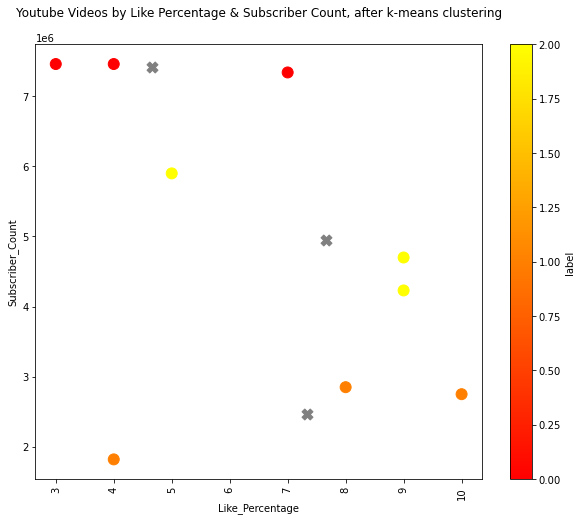

In [18]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Scatter Plot for All youtube videos by their labels
df_table.plot(kind='scatter', x='Like_Percentage', 
               y='channel.subscriberCount', c='label', colormap='autumn', ax=ax1
              ,marker="o", s=120)


# Scatter Plot for Centroids
centroids_df.plot(kind='scatter', x='Like_Percentage', 
               y='Subscriber_Count', color='gray', ax=ax1,
                marker="X", s=120,)

ttl = ax1.set_title("Youtube Videos by Like Percentage & Subscriber Count, after k-means clustering")
plt.xticks(rotation=90)
ttl.set_position([.5, 1.05])
plt.show()

<h2> Insights</h2>
<p> From the plot , we can see the Youtube videos in the Popular Page are grouped into 3 groups</p>
<ol>
    <li> High Subscriber Count and Low Like Percentage</li>
    <li> Average Subscriber Count and Average Like Percentage</li>
    <li> Low Subscriber Count and Average Like Percenatge</li>
</ol>

<h2>Conclusion</h2>

<p>Using matplotlib, I  have created data visualisations of videos of a particular category in the Popular Page and try
to find the relationship between it's peformance and the attributes of these videos.Furthermore, we use K-Means clustering to group these videos based on their unique attributes</p>